In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

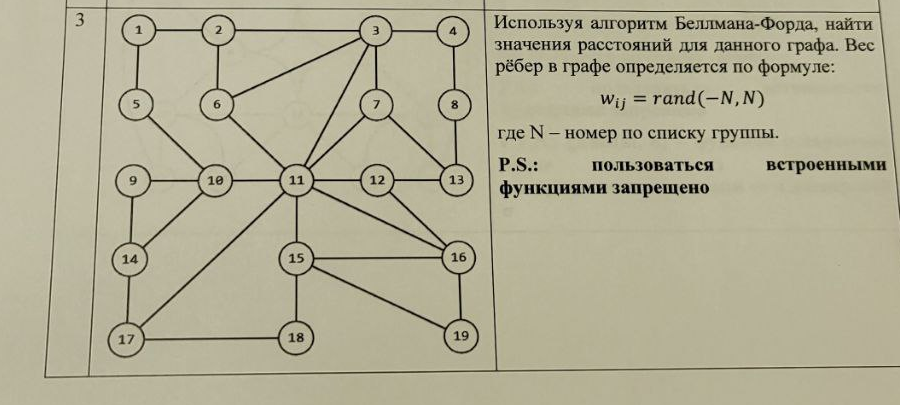

(1, 2, 2) (2, 3, -7) (3, 4, -2) (4, 8, 8) (8, 13, 8) (12, 13, 7)
(12, 16, -11) (16, 19, 2) (19, 15, -1) (15, 18, -5) (18, 17, -8) (14, 17, 7)
(14, 9, -6) (9, 10, -7) (10, 5, 1) (1, 5, -5) (2, 6, 1) (6, 3, 2)
(6, 11, -6) (11, 3, 0) (3, 7, 2) (7, 13, 9) (7, 11, -10) (10, 11, 0)
(11, 12, 0) (14, 10, 5) (17, 11, -11) (11, 16, -10) (11, 15, -7) (15, 16, -11)


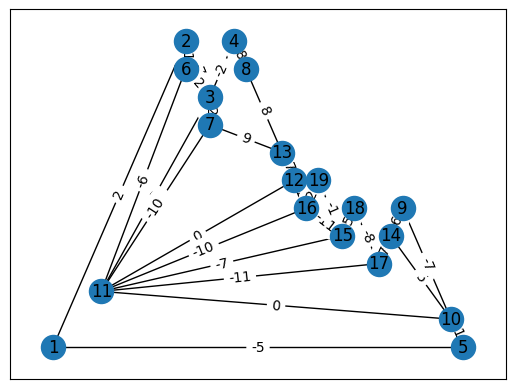

In [ ]:
edges = [
    (1, 2), (2, 3), (3, 4), (4, 8), (8, 13), (12, 13), (12, 16), (16, 19), (19, 15), (15, 18), (18, 17), (14, 17), (14, 9), (9, 10), (10, 5), (1, 5),
    (2, 6), (6, 3), (6, 11), (11, 3), (3, 7), (7, 13), (7, 11),
    (10, 11), (11, 12),
    (14, 10), (17, 11), (11, 16), (11, 15), (15, 16)
]
edges = [(u, v, np.random.randint(-11, 12)) for u, v in edges]
G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [ ]:
def bellman_ford_algorithm(G, source):
    dist = dict.fromkeys(G, float('inf'))
    dist[source] = 0

    for _ in range(len(G) - 1):
        for u, v, weight in G.edges.data('weight'):
            if dist[u] != float('inf') and dist[u] + weight < dist[v]:
                if v == source:
                    continue
                dist[v] = dist[u] + weight
    if float('inf') in list(dist.values()):
        for _ in range(len(G) - 1):
            for u, v, weight in set(G.to_directed().edges.data('weight')).difference(first):
                if dist[u] != float('inf') and dist[u] + weight < dist[v] and dist[v] == float('inf'):
                    if v == source:
                        continue
                    dist[v] = dist[u] + weight

    return dist

result = {}
for node in range(1, 20):
    result[node] = bellman_ford_algorithm(G, node)
pprint(result)

{1: {1: 0,
     2: 2,
     3: -5,
     4: -7,
     5: -24,
     6: -3,
     7: -40,
     8: 1,
     9: -18,
     10: -25,
     11: -30,
     12: 16,
     13: 9,
     14: -12,
     15: -6,
     16: 5,
     17: -19,
     18: -11,
     19: 7},
 2: {1: 2,
     2: 0,
     3: -7,
     4: -9,
     5: -26,
     6: -5,
     7: -42,
     8: -1,
     9: -20,
     10: -27,
     11: -32,
     12: 14,
     13: 7,
     14: -14,
     15: -8,
     16: 3,
     17: -21,
     18: -13,
     19: 5},
 3: {1: -24,
     2: -7,
     3: 0,
     4: -2,
     5: -19,
     6: 2,
     7: -35,
     8: 6,
     9: -13,
     10: -20,
     11: -25,
     12: 21,
     13: 14,
     14: -7,
     15: -1,
     16: 10,
     17: -14,
     18: -6,
     19: 12},
 4: {1: -22,
     2: -38,
     3: -31,
     4: 0,
     5: -17,
     6: -29,
     7: -33,
     8: 8,
     9: -11,
     10: -18,
     11: -23,
     12: 23,
     13: 16,
     14: -5,
     15: 1,
     16: 12,
     17: -12,
     18: -4,
     19: 14},
 5: {1: -5,
     2: -8,
    

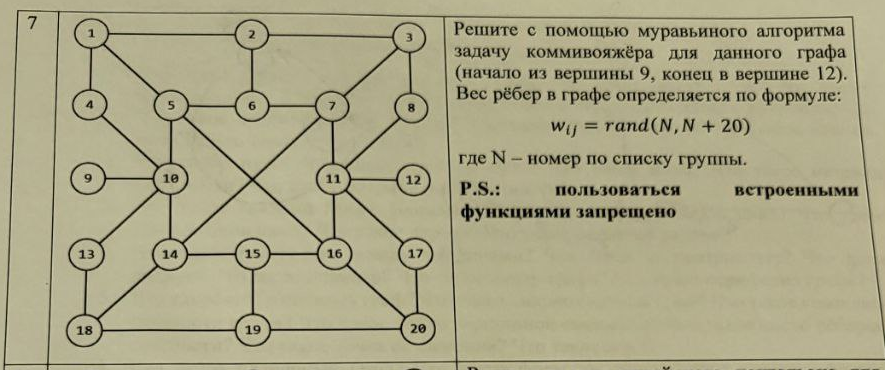

In [56]:
edges = [
    (1, 2), (2, 3), (3, 8), (8, 11), (11, 12), (1, 4), (4, 10), (9, 10),
    (10, 5), (1, 5), (5, 6), (2, 6), (6, 7), (7, 3), (7, 11),
    (10, 13), (13, 18), (18, 19), (19, 20), (20, 17), (17, 11),
    (10, 14), (14, 15), (15, 19), (14, 18), (15, 16), (16, 11), (16, 20),
    (5, 16), (14, 7)
]
edges = [(u, v, np.random.randint(11, 12 + 20)) for u, v in edges]
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [116]:
class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = distances
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.n_cities = len(distances)
        self.pheromone = np.zeros_like(distances, dtype=np.float64)
        self.pheromone[distances > 0] += 1

    def run(self):
        shortest_path = None
        best_length = float('inf')
        
        for _ in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, best_length)
            self.pheromone *= (1 - self.decay)
            
            best_path, best_path_length = min(all_paths, key=lambda x: x[1])
            if best_path_length < best_length:
                best_length = best_path_length
                shortest_path = best_path
                
        return shortest_path, best_length

    def spread_pheronome(self, all_paths, best_length):
        for path, length in all_paths:
            if length < best_length:
                for move in path:
                    self.pheromone[move] += 1 / length

    def gen_all_paths(self):
        all_paths = []
        for _ in range(self.n_ants):
            path = self.gen_path()
            all_paths.append((path, self.path_length(path)))
        return all_paths
        
    def gen_path(self):
        visited = [8]
        current = 8
        end = 11

        while current != end:
            x = self.distances[current]
            near_nodes = np.where(x > 0)[0]
            prob = self.calc_move_probs(current, x, visited)
            if len(set(near_nodes).difference(visited)) == 0:
                visited = [8]
                current = 8
            else:
                while current in visited:
                    current = np.random.choice(near_nodes, p=prob)
                visited.append(current)
        return visited

    def calc_move_probs(self, city, x, visited):
        near_nodes = np.where(x > 0)[0]
        pheromone = np.copy(self.pheromone[city])

        pheromone = pheromone[near_nodes]
        distances = x[near_nodes]
        
        prob = (pheromone**self.alpha) * ((1.0 / distances) ** self.beta)
        prob /= prob.sum()
        return prob

    def path_length(self, path):
        length = 0
        for i in range(len(path) - 1):
            length += self.distances[path[i]][path[i + 1]]
        return length
    
aco = AntColony(nx.adjacency_matrix(G, nodelist=list(range(1, 21))).toarray(), n_ants=10, n_best=2, n_iterations=100, decay=0.95)
best_path, best_length = aco.run()

print("Путь:", best_path)
print("Длина пути:", best_length)


Путь: [8, 9, 13, 6, 10, 11]
Длина пути: 124
